In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Repetition suppresion

In [18]:
pcn_dir = os.path.join('results', 'recurrent_models')
energies = np.load(os.path.join(pcn_dir, 'energies_evolution.npy'))
energies.shape

(5, 100)

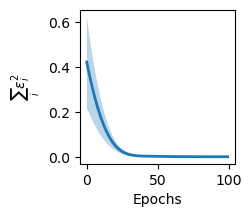

In [19]:
plt.figure(figsize=(2, 2))
plt.plot(energies.mean(axis=0), lw=2)
plt.fill_between(np.arange(energies.shape[1]), energies.mean(axis=0) - energies.std(axis=0), energies.mean(axis=0) + energies.std(axis=0), alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel(r'$\sum_i \varepsilon_i^2$')
# plt.title('Energy evolution')
plt.savefig(os.path.join(pcn_dir, 'energy_evolution.pdf'), bbox_inches='tight')
plt.show()

In [12]:
error_neurons = np.load(os.path.join(pcn_dir, 'error_neurons.npy'))
error_neurons.shape

(3, 4096)

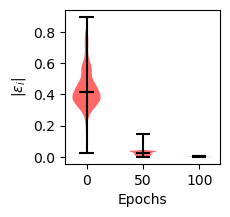

In [13]:
import matplotlib.pyplot as plt

# Create the violin plot
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
colors = plt.cm.viridis(np.linspace(0, 1, 3))
parts = ax.violinplot(error_neurons.T, showmedians=True)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$| \varepsilon_i |$')

for i, body in enumerate(parts['bodies']):
    # body.set_edgecolor('black')
    body.set_facecolor('red')
    body.set_alpha(0.6)  # Set transparency

parts['cmedians'].set_edgecolor('black')  # Set color of medians
parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
parts['cmins'].set_edgecolor('black')     # Set color of the min caps
parts['cbars'].set_edgecolor('black')

# Set x-axis tick labels
ax.set_xticks(ticks=[1, 2, 3], labels=['0', '50', '100'])
# ax.set_yscale('log')

# Show the plot
plt.savefig(os.path.join(pcn_dir, 'error_neurons.pdf'), bbox_inches='tight')
plt.show()

In [14]:
hpcn_dir = os.path.join('results', 'vanilla_h_models')
energies = np.load(os.path.join(hpcn_dir, 'energies_evolution.npy'))
energies.shape

(5, 100)

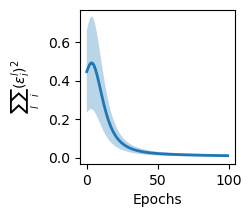

In [15]:
plt.figure(figsize=(2, 2))
plt.plot(energies.mean(axis=0), lw=2)
plt.fill_between(np.arange(energies.shape[1]), energies.mean(axis=0) - energies.std(axis=0), energies.mean(axis=0) + energies.std(axis=0), alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel(r'$\sum_l \sum_i (\varepsilon_i^l)^2$')
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.title('Energy evolution')
plt.savefig(os.path.join(hpcn_dir, 'energy_evolution.pdf'), bbox_inches='tight')
plt.show()

In [16]:
error_neurons = np.load(os.path.join(hpcn_dir, 'error_neurons.npy'))
error_neurons.shape

(3, 4608)

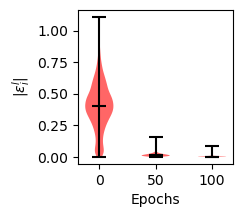

In [17]:
# Create the violin plot
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
colors = plt.cm.viridis(np.linspace(0, 1, 3))
parts = ax.violinplot(error_neurons.T, showmedians=True)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$| \varepsilon_i^l |$')

for i, body in enumerate(parts['bodies']):
    # body.set_edgecolor('black')
    body.set_facecolor('red')
    body.set_alpha(0.6)  # Set transparency
# set color of means

parts['cmedians'].set_edgecolor('black')  # Set color of medians
parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
parts['cmins'].set_edgecolor('black')     # Set color of the min caps
parts['cbars'].set_edgecolor('black')

# Set x-axis tick labels
ax.set_xticks(ticks=[1, 2, 3], labels=['0', '50', '100'])
# ax.set_yscale('log')

# Show the plot
plt.savefig(os.path.join(hpcn_dir, 'error_neurons.pdf'), bbox_inches='tight')
plt.show()

## Standing's plots

In [14]:
pcn_dir = os.path.join('results', 'recurrent_models')
if not os.path.exists(pcn_dir):
    os.makedirs(pcn_dir)

pcn_gaussian_uncor = np.load(os.path.join(pcn_dir, 'PCN_error_probs_gaussian_b_0.npy'))
pcn_gaussian_cor = np.load(os.path.join(pcn_dir, 'PCN_error_probs_gaussian_b_04.npy'))
pcn_tinyimagenet = np.load(os.path.join(pcn_dir, 'PCN_error_probs_tinyimagenet_b_0.npy'))
pcn_large_tinyimagenet = np.load(os.path.join(pcn_dir, 'PCN_error_probs_large_tinyimagenet_b_0.npy'))
pcn_tinyimagenet[-2:] = pcn_large_tinyimagenet

hn_dir = os.path.join('results', 'hopfield')
HN_gaussian_uncor = np.load(os.path.join(hn_dir, 'HN_error_probs_gaussian_b_0.npy'))
HN_gaussian_cor = np.load(os.path.join(hn_dir, 'HN_error_probs_gaussian_b_04.npy'))
HN_tinyimagenet = np.load(os.path.join(hn_dir, 'HN_error_probs_tinyimagenet_b_0.npy'))

MCHN_gaussian_uncor = np.load(os.path.join(hn_dir, 'MCHN_error_probs_gaussian_b_0.npy'))
MCHN_gaussian_cor = np.load(os.path.join(hn_dir, 'MCHN_error_probs_gaussian_b_04.npy'))
MCHN_tinyimagenet = np.load(os.path.join(hn_dir, 'MCHN_error_probs_tinyimagenet_b_0.npy'))

In [15]:
pcn_tinyimagenet, pcn_large_tinyimagenet

(array([[0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.005  ],
        [0.     , 0.     , 0.     , 0.0025 , 0.     ],
        [0.009  , 0.004  , 0.009  , 0.008  , 0.007  ],
        [0.05925, 0.053  , 0.058  , 0.05625, 0.05775],
        [0.2393 , 0.2437 , 0.2451 , 0.2466 , 0.2491 ]]),
 array([[0.05925, 0.053  , 0.058  , 0.05625, 0.05775],
        [0.2393 , 0.2437 , 0.2451 , 0.2466 , 0.2491 ]]))

[   20    40   100   200   400  1000  4000 10000]


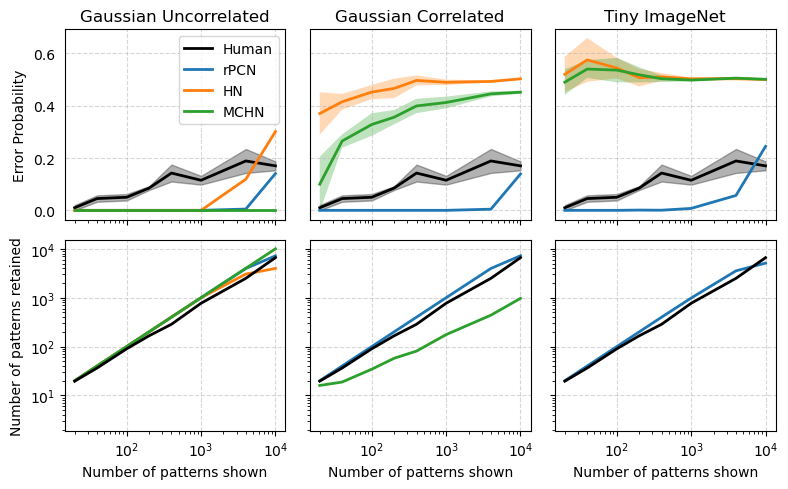

In [22]:
sample_sizes = [20, 40, 100, 200, 400, 1000, 4000, 10000]
# x = np.log10(np.array(sample_sizes))
x = np.array(sample_sizes)
print(x)
lw = 2
alpha = 0.3
def plot_one_ax(ax, pcn, hn, mchn, title):
    ax.plot(x, pcn.mean(axis=1), lw=lw, label='rPCN')
    ax.fill_between(
        x, 
        pcn.mean(axis=1) - pcn.std(axis=1), 
        pcn.mean(axis=1) + pcn.std(axis=1), 
        alpha=alpha
    )
    ax.plot(x, hn.mean(axis=1), lw=lw, label='HN')
    ax.fill_between(
        x, 
        hn.mean(axis=1) - hn.std(axis=1), 
        hn.mean(axis=1) + hn.std(axis=1), 
        alpha=alpha
    )
    ax.plot(x, mchn.mean(axis=1), lw=lw, label='MCHN')
    ax.fill_between(
        x, 
        mchn.mean(axis=1) - mchn.std(axis=1), 
        mchn.mean(axis=1) + mchn.std(axis=1), 
        alpha=alpha
    )
    ax.set_title(title)
    # ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 

test_trials = [20, 40, 80, 80, 80, 80, 160, 160]
mean_errors = [0.2, 1.8, 4.0, 6.8, 11.4, 9.2, 30.2, 27.2]
std = [0.45, 1.1, 2.2, 1.3, 5.8, 3.0, 16.4, 6.1]
std = [a/b for a, b in zip(std, test_trials)]/np.sqrt(5) # 5 is the number subjects for normal picture in table 1 of Standing (1973)
human_error_probs = [a/b for a, b in zip(mean_errors, test_trials)]

def get_retain(error_probs):
    return sample_sizes - 2 * (error_probs.mean(axis=1) * sample_sizes)

HN_retained_uncor = get_retain(HN_gaussian_uncor)
HN_retained_cor = get_retain(HN_gaussian_cor)
HN_retained_tinyimagenet = get_retain(HN_tinyimagenet)

MCHN_retained_uncor = get_retain(MCHN_gaussian_uncor)
MCHN_retained_cor = get_retain(MCHN_gaussian_cor)
MCHN_retained_tinyimagenet = get_retain(MCHN_tinyimagenet)

PCN_retained_uncor = get_retain(pcn_gaussian_uncor)
PCN_retained_cor = get_retain(pcn_gaussian_cor)
PCN_retained_tinyimagenet = get_retain(pcn_tinyimagenet)

experimental_retained = [19.6, 36.4, 90, 166, 286, 770, 2490, 6600]
   
fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex='col', sharey='row')
for a in ax[0]:
    a.plot(x, human_error_probs, lw=lw, label='Human', color='k')
    a.fill_between(
        x, 
        np.array(human_error_probs) - np.array(std), 
        np.array(human_error_probs) + np.array(std), 
        alpha=alpha,
        color='k'
    )
    if a == ax[0,0]:
        a.set_ylabel('Error Probability')

plot_one_ax(ax[0,0], pcn_gaussian_uncor, HN_gaussian_uncor, MCHN_gaussian_uncor, 'Gaussian Uncorrelated')
plot_one_ax(ax[0,1], pcn_gaussian_cor, HN_gaussian_cor, MCHN_gaussian_cor, 'Gaussian Correlated')
plot_one_ax(ax[0,2], pcn_tinyimagenet, HN_tinyimagenet, MCHN_tinyimagenet, 'Tiny ImageNet')


ax[1,0].loglog(sample_sizes, PCN_retained_uncor, lw=lw, label='PCN')
ax[1,0].loglog(sample_sizes, HN_retained_uncor, lw=lw, label='HN')
ax[1,0].loglog(sample_sizes, MCHN_retained_uncor, lw=lw, label='MCHN')
ax[1,0].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,0].set_ylabel('Number of patterns retained')
ax[1,0].set_xlabel('Number of patterns shown')

ax[1,1].loglog(sample_sizes, PCN_retained_cor, lw=lw, label='PCN')
ax[1,1].loglog(sample_sizes, HN_retained_cor, lw=lw, label='HN', alpha=0)
ax[1,1].loglog(sample_sizes, MCHN_retained_cor, lw=lw, label='MCHN')
ax[1,1].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,1].set_xlabel('Number of patterns shown')

ax[1,2].loglog(sample_sizes, PCN_retained_tinyimagenet, lw=lw, label='PCN')
# ax[2].loglog(sample_sizes, HN_retained_tinyimagenet, lw=lw, label='HN')
# ax[2].loglog(sample_sizes, MCHN_retained_tinyimagenet, lw=lw, label='MCHN')
ax[1,2].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,2].set_xlabel('Number of patterns shown')

for a in ax.flatten():
    a.set_xscale('log')
    a.grid(True, linestyle='--', alpha=0.5)
    if a == ax[0,0]:
        a.legend()

fig.tight_layout()
plt.savefig('results/imgs/comparison.pdf')
plt.show()

## Hierarchical models

In [3]:
save_path = os.path.join('results', 'hierarchical_models')
energy = np.load(os.path.join(save_path, 'energy.npz'))

In [4]:
e_fam = energy['energy_fam']
e_nov = energy['energy_nov']
e_test_nov = energy['energy_test_nov']

e_fam.shape

(100, 3)

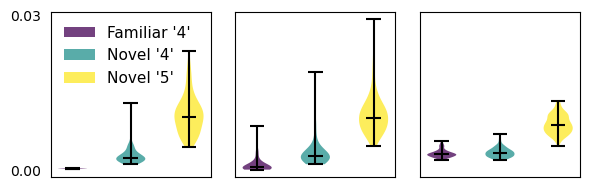

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2), sharey=True)
colors = plt.cm.viridis(np.linspace(0, 1, 3))
for l in range(3):
    data = [e_fam[:, 2-l], e_nov[:, 2-l], e_test_nov[:, 2-l]]
    parts = ax[l].violinplot(data, showmeans=False, showmedians=True)
    # Coloring each violin plot
    for i, body in enumerate(parts['bodies']):
        body.set_facecolor(colors[i])
        # body.set_edgecolor('black')
        body.set_alpha(0.75)  # Set transparency

    # Set color for the other components: medians, caps, etc.
    parts['cmedians'].set_edgecolor('black')  # Set color of medians
    parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
    parts['cmins'].set_edgecolor('black')     # Set color of the min caps
    parts['cbars'].set_edgecolor('black')

    if l == 0:
        ax[l].legend([f"Familiar '{4}'", f"Novel '{4}'", f"Novel '{5}'"], loc='upper left', fontsize=11, frameon=False)

    # ax[l].set_title(rf'$\Vert \varepsilon^{l} \Vert_2^2$')
    
    ax[l].set_xticks([])
    ax[l].yaxis.set_ticks_position('none') 
    ax[l].tick_params(axis='y', labelsize=10)
    
    # Set y tick labels
    ax[l].set_yticks([0, 0.03])

plt.tight_layout()
plt.savefig(save_path + '/energy_distribution.pdf', format = 'pdf' , bbox_inches='tight')
plt.show()

In [26]:
separability = np.load(os.path.join(save_path, 'separability.npz'))
sep_12 = separability['separability_12']
sep_23 = separability['separability_23']
sep_12, sep_23

(array([[0.30608862, 2.04691204, 1.81790675],
        [0.27459481, 0.86956449, 1.40251362],
        [0.27080808, 0.89809704, 2.24104055],
        [0.23954975, 0.75628678, 2.3277089 ],
        [0.22422676, 1.01856075, 2.27667636]]),
 array([[3.96198622, 3.71706221, 4.37789754],
        [3.6153008 , 2.13201459, 3.76086301],
        [3.61684642, 2.4458089 , 3.38634327],
        [4.25301304, 2.35842882, 5.149383  ],
        [3.98218601, 3.18545999, 3.8888723 ]]))

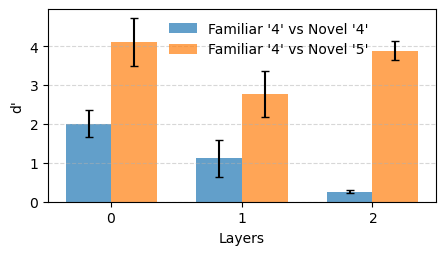

In [66]:
plt.figure(figsize=(5, 2.5))
# plt.title(f"d' separability between classes of digits by layers")

avg12 = np.mean(sep_12, axis=0)[::-1]
std12 = np.std(sep_12, axis=0)[::-1]
avg23 = np.mean(sep_23, axis=0)[::-1]
std23 = np.std(sep_23, axis=0)[::-1]

# x-axis locations for the groups
layers = np.arange(3)

# Width of the bars
bar_width = 0.35

# Plotting the bars
# plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=yerr12,
#         label=f'sep. between familiar {base_class} and novel {base_class}', capsize=5)
# plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=yerr23,
#         label=f'sep. between novel {base_class} and novel {test_class}', capsize=5)
plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=std12,
        label=f"Familiar '{4}' vs Novel '{4}'", capsize=3, alpha=0.7)
plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=std23,
        label=f"Familiar '{4}' vs Novel '{5}'", capsize=3, alpha=0.7)

plt.ylabel("d'")
plt.xlabel('Layers')
plt.xticks(layers, [f'${i}$' for i in range(3)])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.57, 1), frameon=False)
plt.savefig(save_path + '/separability_by_layers.pdf', bbox_inches='tight')
# plt.show()

In [30]:
avg12

array([0.2630536 , 1.11788422, 2.01316924])